<a href="https://colab.research.google.com/github/Vallabh-Govindpurkar/Sales-Price-Prediction-/blob/main/Car_Sales_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction using Machine Learning
## Project Overview
- Predicts future product sales based on historical data.
- Uses Machine Learning models (Random Forest, XGBoost).
- Helps businesses optimize marketing strategies.

## Dataset
- Contains sales, advertising spend, promotions, and customer segmentation.

## Steps Followed
- Data cleaning and preprocessing.
- Model training and evaluation.
- Insights on feature importance.

## Results
- Best model: XGBoost (R² Score: 0.9986)



In [ ]:
import pandas as Pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [ ]:
# Load The Dataset
# Load The Dataset
df = Pd.read_csv('/content/car_purchasing.csv', encoding='latin-1') # or encoding='ISO-8859-1'

In [ ]:
df.head(10)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [ ]:
df.isnull().sum()

,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


<Axes: ylabel='car purchase amount'>

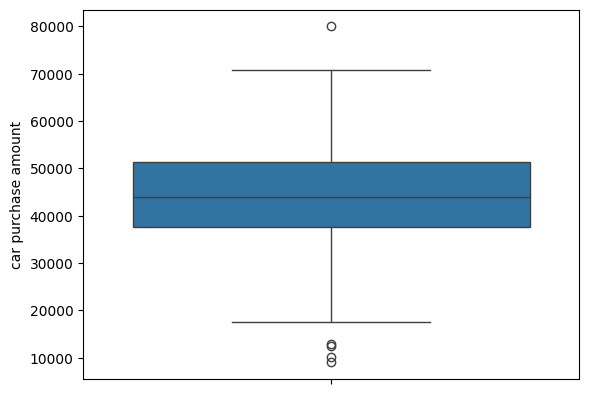

In [ ]:
# Handling Outliers
sns.boxplot(df['car purchase amount'])

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df["car purchase amount"].quantile(0.25)
Q3 = df["car purchase amount"].quantile(0.75)
IQR = Q3 - Q1

# Define Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect Outliers
outliers = df[(df["car purchase amount"] < lower_bound) | (df["car purchase amount"] > upper_bound)]
print(outliers)


       customer name              customer e-mail     country  gender  \
30  Herman Stevenson  sociosqu.ad.litora@erat.com  Costa Rica       1   

         age  annual Salary  credit card debt    net worth  \
30  33.48313     39627.1248       9371.511071  319837.6593   

    car purchase amount  
30          17584.56963  


In [ ]:
df = df[(df["car purchase amount"] >= lower_bound) & (df["car purchase amount"] <= upper_bound)]
print(df)

       customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0 

In [ ]:
X = df.drop(columns=['customer name'])
y = df['car purchase amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (396, 8)
X_test shape: (99, 8)
y_train shape: (396,)
y_test shape: (99,)


In [ ]:
X = df.drop(columns=['country', 'customer name', 'customer e-mail'])  # Drop 'customer name' and 'customer e-mail'
y = df['car purchase amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now proceed with model fitting:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, predictions))
# Calculate RMSE manually if 'squared' is not supported
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("R² Score:", r2_score(y_test, predictions))


MAE: 1.1134419985341303e-11
RMSE: 1.4203232207714752e-11
R² Score: 1.0


In [ ]:
# Trying Advanced Models for Better Predictions
# Try Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

In [ ]:
print("RF R² Score:", r2_score(y_test, rf_predictions))


RF R² Score: 0.9984361453188958


In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)
print("XGBoost R² Score:", r2_score(y_test, xgb_predictions))

XGBoost R² Score: 0.9986964061451253


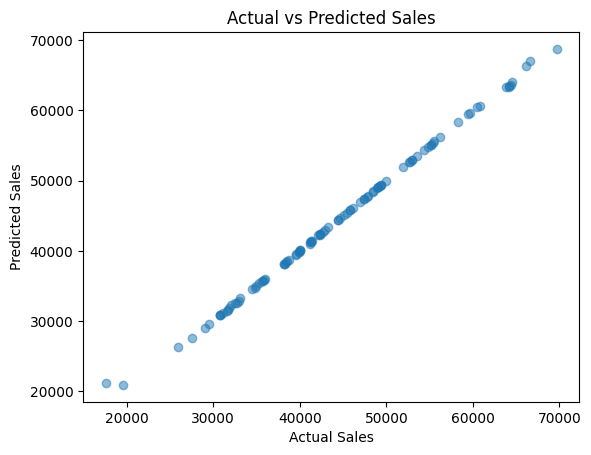

In [ ]:

plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

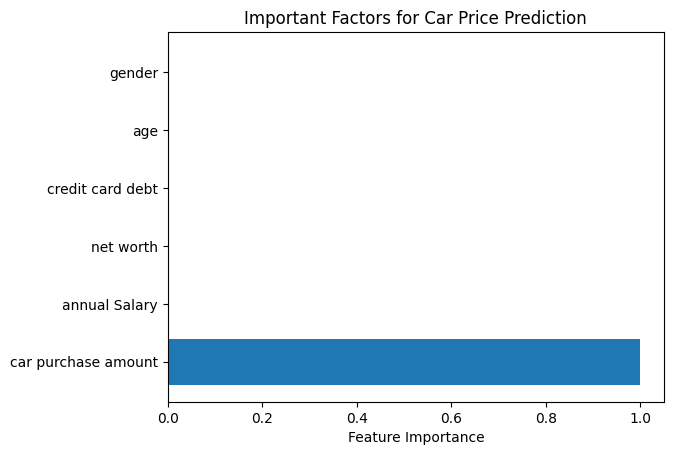

In [ ]:
importance = rf_model.feature_importances_
features = X.columns

sorted_idx = np.argsort(importance)[::-1]
plt.barh(features[sorted_idx], importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Important Factors for Car Price Prediction")
plt.show()